In [1]:
import pandas as pd
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob # for sentiment analysis
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.path.isfile('Friends_Pilot-Analysis.csv')

False

In [2]:
# Load Dataset

df = pd.read_csv('Book4.csv',encoding='utf-8')

In [3]:
# Provides Concise Summary of our Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
character    305 non-null object
text         303 non-null object
dtypes: object(2)
memory usage: 4.9+ KB


In [4]:
# Create Word Count Column
df['word_count'] = df['text'].str.split().str.len()
#print(df.character.value_counts().iloc[:8].index)

# Which Character has most lines?

Text(0.5, 1.0, 'Friends: Character Line Count')

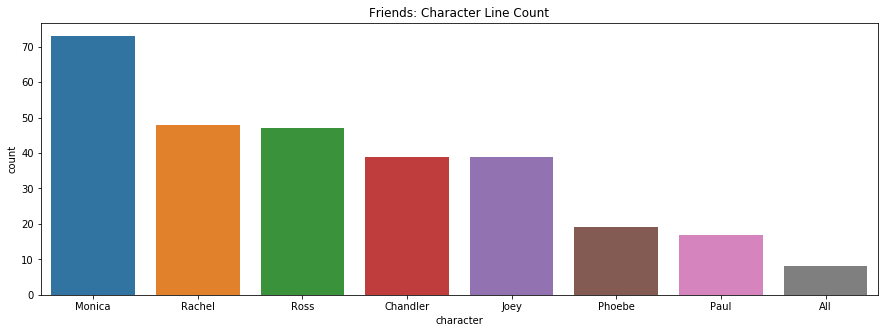

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'character', data = df, order = df.character.value_counts().iloc[:8].index)
plt.title('Friends: Character Line Count')

# Which Character uses most words on average?

Text(0.5, 1.0, 'Friends : Average Character Word Counts')

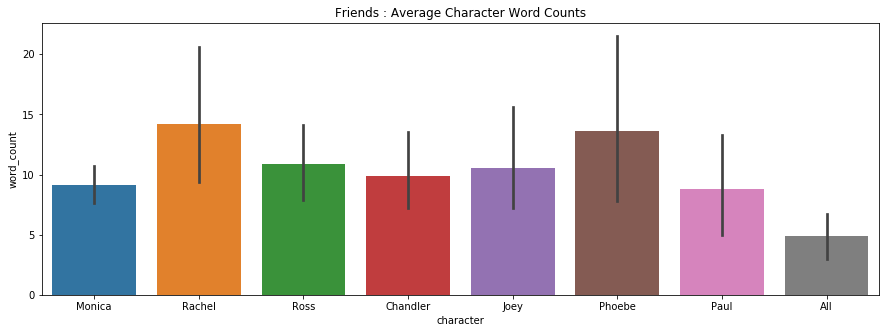

In [6]:
plt.figure(figsize=(15,5))
sns.barplot(x='character',y='word_count',data=df, order = df.character.value_counts().iloc[:8].index)
plt.title('Friends : Average Character Word Counts')

# Which character uses the most words in total?

In [7]:
total_sum = df.groupby(['character'])['word_count'].sum().reset_index()
#print(total_sum)

In [8]:
total_sum = total_sum.sort_values(by='word_count', ascending=False)
#print(total_sum)

Text(0.5, 1.0, 'Friends : Total Character Word Counts')

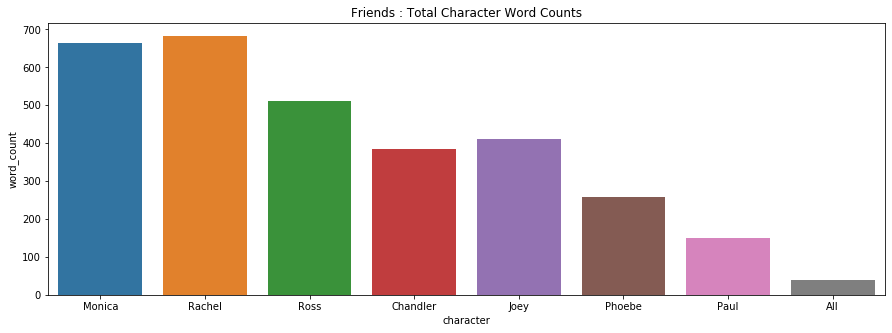

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x='character',y='word_count', data=total_sum, order = df.character.value_counts().iloc[:8].index)
plt.title('Friends : Total Character Word Counts')

In [10]:
# Pre Processing
# Clean and Normalize Text
# - tokenize
# - lowercase
# - remove punctuation
# - remove numeric characters
# - remove stopwords

stopwords = set(stopwords.words('english'))
#df['text'].dropna(inplace=True)
#df['new_text'] = df['text'].apply(word_tokenize)

def clean(text):
    text = str(text)
    text = word_tokenize(text)
    text = [word.lower() for word in text]
    punct = str.maketrans('', '', string.punctuation) 
    text = [word.translate(punct) for word in text] 
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean)

In [11]:
# Create Word Count Column for Clean Text

df['clean_word_count'] = df['clean_text'].str.split().str.len()
print(df['clean_text'])

0                                  nothing tell guy work
1                  cmon going guy got ta something wrong
2                    right joey nice hump hump hairpiece
3                                         wait eat chalk
4                          cause nt want go went carl oh
                             ...                        
300                             kids new dream las vegas
301                                      ahh miss coffee
302    ugh excuse could give guy go ahead thank sorry...
303                          okay las vegas liza minelli
304                                                  nan
Name: clean_text, Length: 305, dtype: object


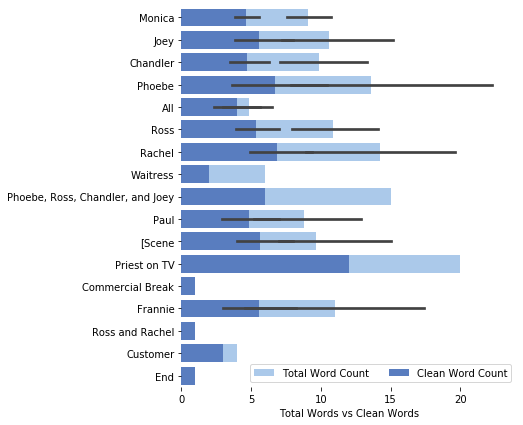

In [12]:
f, ax = plt.subplots(figsize=(6, 7))

sns.set_color_codes("pastel")
sns.barplot(x="word_count", y="character", data=df,
            label="Total Word Count", color="b")

sns.set_color_codes("muted")
sns.barplot(x="clean_word_count", y="character", data=df,
            label="Clean Word Count", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Words vs Clean Words")
sns.despine(left=True, bottom=True)

In [13]:
# Apply Sentiment Polarity to Text with TextBlob

df['polarity'] = [round(TextBlob(word).sentiment.polarity, 2) for word in df['clean_text']]
df['sentiment'] = ['positive' if polarity > 0 
                             else 'negative' if polarity < 0 
                                 else 'neutral' 
                                     for polarity in df['polarity']]